# Proyecto 1 - Análisis Avanzado de Datos

Jessenia Piza Londoño -
Carlos Sebastián Martínez Vidal -
Manuela Acosta Fajardo 

## Introducción

Por medio de este proyecto realizaremos el análisis del dataset Bike Sharing. Este dataset cuenta con variables tales como la estación del año, el clima, indicadores de si es un día de vacaciones o no, así como un día entre semana o fin de semana, entre otros. Además, la variable 'count' indica la cantidad de bicicletas rentadas en un día dado. Nuestro objetivo, entonces, es analizar cuál de estas variables influye más en el número de bicicletas rentadas en un día. 

Empezamos importando las librerías necesarias para la realización del proyecto.

In [57]:
# Standard imports
import warnings

# Math and data processing
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

# StatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from patsy import dmatrix

# scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

# Visualization
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

%matplotlib inline
mpl.style.use('ggplot')

warnings.filterwarnings('ignore')

Ahora, cargamos el dataset a utilizar. Cabe aclarar que hay dos datasets, 'day' y 'hour', los cuales tienen las mismas variables. Haremos uso solamente del dataset 'day', para analizar el número de bicicletas rentadas en un día dado. 

In [58]:
bike_day = pd.read_csv("Bike-Sharing-Dataset/day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [59]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


A continuación veremos algunas medidas de tendencia central y dispersión de cada una de las columnas del dataframe. 

In [60]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Observamos el porcentaje de datos perdidos en cada columna, y vemos que corresponde a 0% en todos los casos.

In [61]:
round(100*(bike_day.isnull().sum()/len(bike_day)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Además, vemos el porcentaje del recuento nulo por filas. 

In [62]:
round((bike_day.isnull().sum(axis=1)/len(bike_day))*100,2).sort_values(ascending=False)

0      0.0
480    0.0
482    0.0
483    0.0
484    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
730    0.0
Length: 731, dtype: float64

A continuación hacemos un duplicado de los datos, y revisamos si hay duplicados en cada una de las filas, y si es así, los eliminamos. 

In [63]:
bike_dup = bike_day.copy()

bike_dup.drop_duplicates(subset=None, inplace=True)

Ahora creamos una copia del dataframe sin la columna instant, ya que esta tiene valores únicos que no influirán mucho en el análisis final.

In [64]:
bike_dummy=bike_day.iloc[:,1:16]

In [65]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: dteday, Length: 731, dtype: int64 



3    188
2    184
1    181
4    178
Name: season, dtype: int64 



1    366
0    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64 



0    710
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64 



1    500
0    231
Name: workingday, dtype: int64 



1    463
2    247
3     21
Name: weathersit, dtype: int64 



0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: temp, Length: 499, dtype: int64 



0.654688    4
0.375621    3
0.637008    3
0.571975    2
0.466525    2
     

Gracias a lo anterior, vemos que no hay ningún valor desconocido o basura en el dataframe. 

A su vez, eliminamos columnas redudantes, de la siguiente manera. 

In [66]:
bike_new=bike_day[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [67]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


Ahora convertimos las variables 'season', 'weathersit', 'mnth' y 'weekday' a variables categóricas, así:

In [68]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [69]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    int64   
 2   mnth        731 non-null    category
 3   holiday     731 non-null    int64   
 4   weekday     731 non-null    category
 5   workingday  731 non-null    int64   
 6   weathersit  731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   hum         731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  cnt         731 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


A continuación, creamos una variable Dummy, eliminamos la variable original para la cual creamos la variable dummy y eliminamos la primera variable dummy para cada conjunto de dummies creado. 

In [70]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    uint8  
 9   season_3      731 non-null    uint8  
 10  season_4      731 non-null    uint8  
 11  mnth_2        731 non-null    uint8  
 12  mnth_3        731 non-null    uint8  
 13  mnth_4        731 non-null    uint8  
 14  mnth_5        731 non-null    uint8  
 15  mnth_6        731 non-null    uint8  
 16  mnth_7        731 non-null    uint8  
 17  mnth_8        731 non-null    uint8  
 18  mnth_9        731 non-null    

### Heatmap

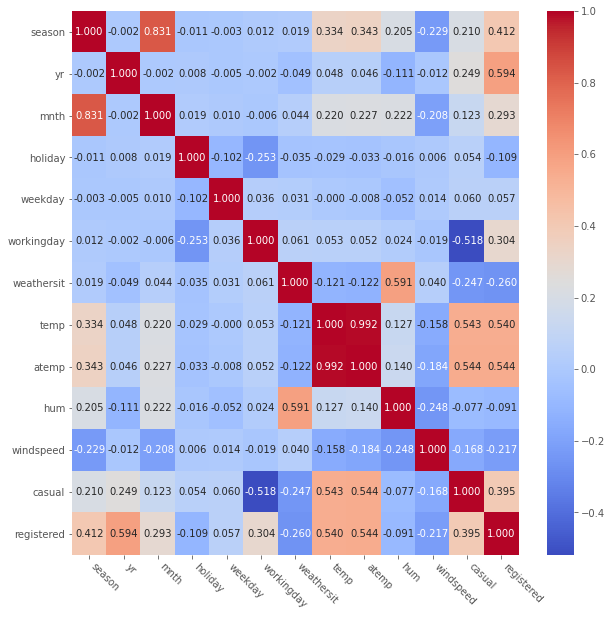

In [71]:
plt.figure(figsize=(10, 10))
sns.heatmap(bike_day.iloc[:,1:15].corr(),cmap='coolwarm',annot=True, fmt="1.3f")
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

Con el heatmap anterior podemos ver que, a primera vista, las variables más correlacionadas con el resto de variables son 'casual' y 'registered', así como 'cnt'. 

### Pairplot

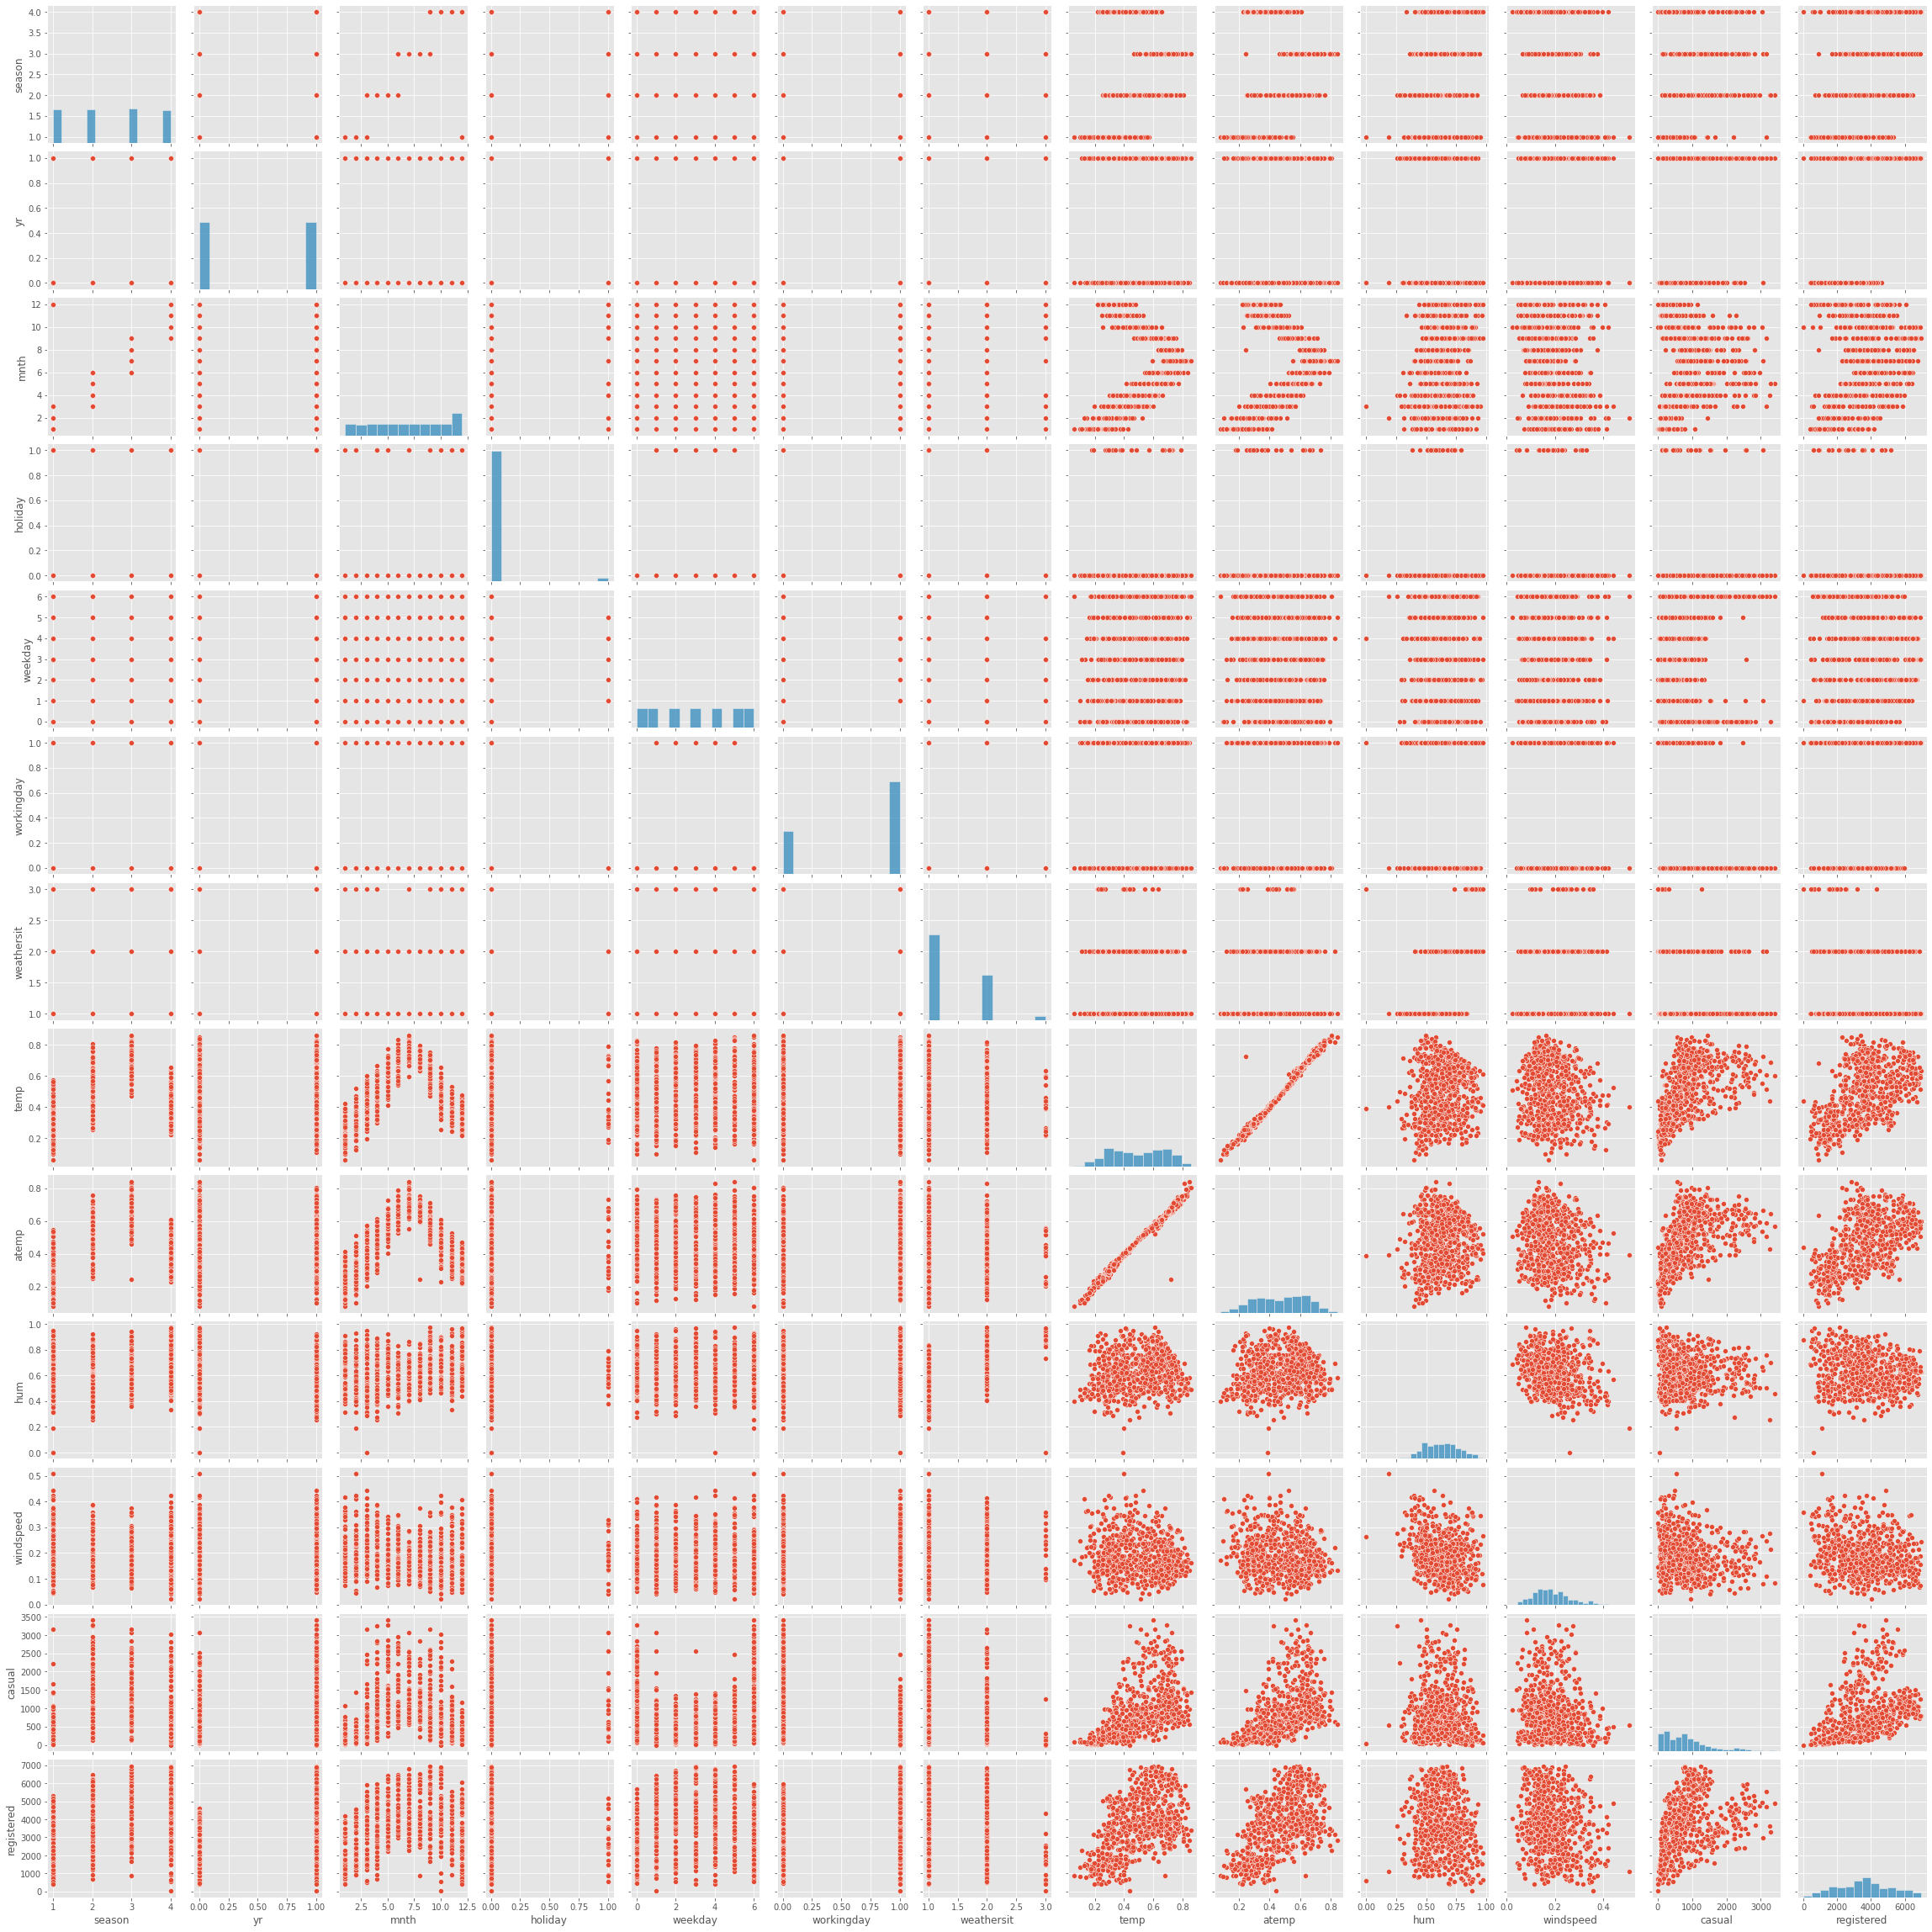

In [72]:
sns.pairplot(bike_day.iloc[:,1:15])

<AxesSubplot:>

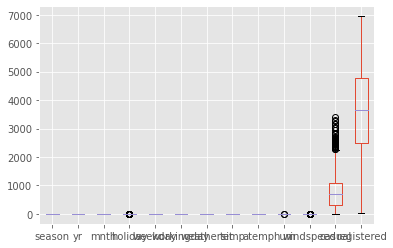

In [73]:
bike_day.iloc[:,1:15].boxplot()

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 1152x1152 with 0 Axes>

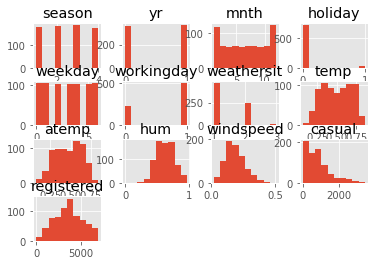

In [74]:
plt.figure(figsize=(16, 16))
bike_day.iloc[:,1:15].hist()

## Modelos de Regresión Múltiple

Dado que ya organizamos los datos, separando las variables de `season, mnth, weekday,weathersit` en variables categóricas y el resto de las variables son numéricas, obsevamos el dataset obtenido:

In [75]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


Tomamos como variable dependiente la variable asociada al `cnt`

In [76]:
X = bike_new.drop(columns='cnt')
y = bike_new['cnt']

In [77]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state=101)

### Lineal

In [78]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [79]:
est = smf.ols('cnt ~ yr + holiday + workingday + temp + atemp + hum + windspeed + season_2 + season_3 + season_4 + mnth_2 + mnth_3 +\
            mnth_4 + mnth_5 + mnth_6 + mnth_7 + mnth_8 + mnth_9 + mnth_10 + mnth_11 + mnth_12 + weekday_1 + weekday_2 + weekday_3 +\
            weekday_4 + weekday_5 + weekday_6 + weathersit_2 + weathersit_3',bike_new).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1485.8439,239.746,6.198,0.000,1015.138,1956.550
yr,2019.7354,58.220,34.691,0.000,1905.429,2134.042
holiday,-258.8454,160.940,-1.608,0.108,-574.827,57.136
workingday,330.8518,66.825,4.951,0.000,199.651,462.053
temp,2855.0107,1398.156,2.042,0.042,109.942,5600.079
atemp,1786.1574,1462.120,1.222,0.222,-1084.494,4656.808
hum,-1535.4684,292.448,-5.250,0.000,-2109.646,-961.290
windspeed,-2823.2967,414.552,-6.810,0.000,-3637.207,-2009.386
season_2,884.7108,179.492,4.929,0.000,532.305,1237.117
season_3,832.7022,213.129,3.907,0.000,414.255,1251.150


In [80]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

a) ¿Al menos uno de los predictores (descriptores) es útil en predecir la variable respuesta?

Note que cada uno de los predictores está relacionado con la variable respuesta. Sin embargo, hay algunos que tienen un coeficiente no tan alto como para determinar la respuesta.

b) ¿Todos los predictores ayudan a explicar la variable respuesta, o tan sólo un conjunto de predictores es útil?

Los predictores que no son tan útiles según nosotros, son `weekday_2, weekday_3, weekday_4, mnth_2, mnth_7, mnth_11, month_12` dado que estos son los que tienen los valores p más altos y no son tan importantes a la hora de explicar la variable respuesta.

c) ¿Qué tan bien se ajusta el modelo a los datos?

In [81]:
est.rsquared

0.8483678329823122

Note que el 84.83% de los datos se ven descritos en el modelo de regresión lineal.

d) Dado un conjunto de valores para los predictores, ¿Qué valor de la variable respuesta se predice y qué tan exacta es la predicción?

Se tomó una fila de los datos de bike_day, en este caso, se tomó la fila 450. Con esto se pretende determinar si la predicción hecha por la regresión lineal de statsmodels es adecuada.

In [82]:
X_new = pd.DataFrame({'yr': [1], 'holiday' : [0], 'workingday' : [1], 'temp' : [0.445833], 'atemp' : [0.438750], 'hum':[0.477917], 
                      'windspeed':[0.386821], 'season_2':[1], 'season_3':[0], 'season_4':[0], 'mnth_2':[0], 'mnth_3':[1], 'mnth_4':[0],
                      'mnth_5':[0], 'mnth_6':[0], 'mnth_7':[0], 'mnth_8':[0], 'mnth_9':[0], 'mnth_10':[0], 'mnth_11':[0],
                      'mnth_12':[0], 'weekday_1':[1], 'weekday_2':[0], 'weekday_3':[0], 'weekday_4':[0],
                      'weekday_5':[0], 'weekday_6':[0], 'weathersit_2':[0], 'weathersit_3':[0]})
X_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0.445833,0.43875,0.477917,0.386821,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
est.predict(X_new)

0    5375.769388
dtype: float64

In [84]:
bike_new.iloc[450, :].cnt

5558.0

In [85]:
bike_new.iloc[450, :].cnt - est.predict(X_new)

0    182.230612
dtype: float64

Note que la predicción es bastante buena comparada con el valor original. Esto debido a que el $R^2$ es bastante alto y el modelo es capaz de predecir la mayoría de los datos.

## Validación cruzada

Para esta parte, haremos un ajuste de los modelos de regresión lineal vistos anteriormente, seleccionando el mejor valor de $\lambda$ por medio de validación cruzada. 

### Regresión Ridge con Validación Cruzada

Ajustamos el modelo de regresión lineal Ridge escogiendo $\lambda$ con validación cruzada. Para ello, creamos un amplio rango de valores de $\lambda$, creamos el modelo de Regresión Ridge y lo ajustamos con el conjunto de entrenamiento. Seleccionamos como métrica de scoring el MSE. 

In [86]:
scaler = StandardScaler().fit(X_train)
alphas = 10**np.linspace(10,-2,100)

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') 
ridge_cv.fit(scaler.transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=5, scoring='neg_mean_squared_error')

El mejor valor de $\lambda$, obtenido anteriormente, es:

In [87]:
ridge_cv.alpha_

14.174741629268018

Ahora predecimos la salida sobre el conjunto de prueba, usando el valor de $\lambda$ obtenido anteriormente. Además, obtenemos el MSE. 

In [88]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(scaler.transform(X_train), y_train)
mean_squared_error(y_test, ridge.predict(scaler.transform(X_test)))

551997.3600440804

### Regresión Lasso con Validación Cruzada

Ahora ajustamos el modelo de regresión Lasso escogiendo el valor de $\lambda$ por medio de validación cruzada. Para ello, nuevamente creamos un amplio rango de valores de $\lambda$, creamos el modelo de Regresión Lasso y lo ajustamos con el conjunto de entrenamiento.

In [89]:
alphas = 10**np.linspace(10,-2,100)

lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(scaler.transform(X_train), y_train)

LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, max_iter=10000)

El mejor valor de $\lambda$, obtenido en este caso es:

In [90]:
lassocv.alpha_

1.5199110829529332

Ahora predecimos la salida sobre el conjunto de prueba, usando el valor de $\lambda$ obtenido anteriormente. Además, obtenemos el MSE. 

In [91]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(scaler.transform(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scaler.transform(X_test)))

561964.9929500263

### Leave One Out Cross Validation (LOOCV)

A continuación haremos nuevamente un ajuste de los modelos de regresión tratados anteriormente, utilizando los valores de $\lambda$ obtenidos. Esta vez lo haremos mediante malidación LOOCV. Primero, creamos el objeto de validación cruzada y vemos el número de particiones:

In [92]:
loocv = LeaveOneOut()
loocv.get_n_splits(X)

731

Podemos observar que al ser un dataframe tan grande, el número de particiones es grande también. 

#### Regresión lineal con LOOCV

Para la regresión lineal hacemos Regresión Ridge con $\lambda=0$. Generamos los índices con el método `split()`, y después los usamos para predecir el MSE de la regresión. 

In [93]:
mse = []

for train_index, test_index in loocv.split(X):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index] 
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    model = Ridge(alpha=0).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, model.predict(scaler.transform(X_test)))) 
    
mean_mse = np.mean(mse) 

print("Mean MSE = ", mean_mse)

Mean MSE =  8.569340502847278e+30


#### Regresión Ridge con LOOCV

In [94]:
mse = []

for train_index, test_index in loocv.split(X):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index] 
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    model = Ridge(alpha=ridge_cv.alpha_).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, model.predict(scaler.transform(X_test)))) 
    
mean_mse = np.mean(mse) 

print("Mean MSE = ", mean_mse)

Mean MSE =  25359261.184474397


#### Regresión Lasso con LOOCV

In [95]:
mse = []

for train_index, test_index in loocv.split(X):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index] 
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    model = Lasso(alpha=lassocv.alpha_).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, model.predict(scaler.transform(X_test)))) 
    
mean_mse = np.mean(mse) 

print("Mean MSE = ", mean_mse)

Mean MSE =  47559205.701447785


### Scores obtenidos con `cross_val_score`

Observaremos ahora los scores obtenidos con `cross_val_score` de las regresiones que hemos venido planteando. Nuevamente haremos uso de los valores de $\lambda$ obtenidos previamente. En todos los casos haremos una validación cruzada con $k=5$ folds, ya que usaremos k-fold cross validation. 

#### Regresión Lineal

Primero, definimos el modelo de regresión lineal, sin ajustarlo, y calculamos los scores. 

In [96]:
model = Ridge(alpha=0)
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.69839299, -0.34675089,  0.29184485,  0.15395238,  0.65410504])

In [97]:
scores.mean()

0.29030887228349295

#### Regresión Ridge

In [98]:
model = Ridge(alpha=ridge_cv.alpha_)
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.59291866,  0.09428131,  0.22321735, -0.06240867,  0.50284038])

In [99]:
scores.mean()

0.2701698046027867

#### Regresión Lasso

In [100]:
model = Lasso(alpha=lassocv.alpha_)
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.71510753, -0.31510369,  0.28614047,  0.16637397,  0.66573963])

In [101]:
scores.mean()

0.30365158263967723

## Polinomios y Splines

### Regresión polinomial

Empezaremos realizando una regresión polinomial de grado 4 sin ortogonalización. 

In [102]:
X4 = PolynomialFeatures(degree=4).fit_transform(bike_day[['weathersit']])
poly4 = sm.GLS(bike_day['cnt'], X4).fit()
poly4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.196e+15,1.09e+15,-1.092,0.275,-3.34e+15,9.53e+14
x1,1.608e+14,1.47e+14,1.092,0.275,-1.28e+14,4.5e+14
x2,2.528e+15,2.31e+15,1.092,0.275,-2.02e+15,7.07e+15
x3,-1.832e+15,1.68e+15,-1.092,0.275,-5.12e+15,1.46e+15
x4,3.385e+14,3.1e+14,1.092,0.275,-2.7e+14,9.47e+14


Haremos una predicción sobre un grid del clima. Tenemos en cuenta que el clima es 1: si está con pocas nubes o parcialmente nublado, 2: si el clima está nublado y hay neblina, 3: si hay nieve y lluvia ligera y 4: lluvia intensa y tormentas eléctricas.

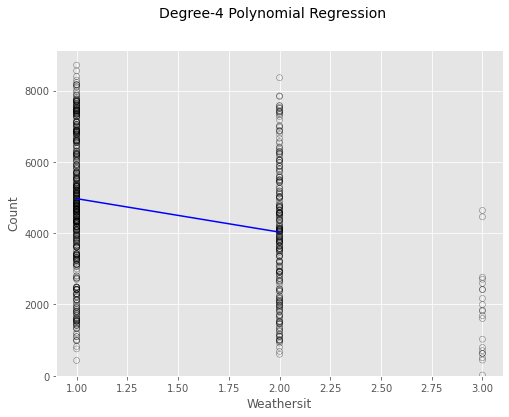

In [103]:
# Generamos una secuencia de valores del clima abarcando el rango
weathersit_grid = np.arange(bike_day.weathersit.min(), bike_day.weathersit.max()).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(weathersit_grid)

# Predecimos el valor del clima generado
y_pred = poly4.predict(X_test)

# Graficamos
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Degree-4 Polynomial Regression', fontsize=14)


# Graficamos la linea de la regresión polonomial
plt.scatter(bike_day.weathersit, bike_day.cnt, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(weathersit_grid, y_pred, color = 'b')
ax.set_ylim(ymin=0)
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.show()

Con esta grafica observamos primero, que los valores que más se presentan en el clima son los del 1 y 2 y muy levemente el 3. Por lo que los climas más comunes en esta zona son o despejados o levemente nublado. Así mismo, estos dos son los climas que realmente interfieren con la cantidad de bicicletas que se rentan y concluimos que el número baja en casi 1000 cuando hay un clima nublado. Por otro lado, nos damos cuenta que practicamente no hay ninguna bicliceta rentada cuando se presenta un clima de 3, que es nieve y lluvia leve con pronóstico de rayos.

In [104]:
X4 = PolynomialFeatures(degree=4).fit_transform(bike_day[['weekday']])
poly4 = sm.GLS(bike_day['cnt'], X4).fit()
poly4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,4223.8308,187.749,22.497,0.000,3855.235,4592.427
x1,166.6391,534.039,0.312,0.755,-881.805,1215.083
x2,-40.5966,412.594,-0.098,0.922,-850.616,769.422
x3,12.5236,107.629,0.116,0.907,-198.777,223.825
x4,-1.4773,8.907,-0.166,0.868,-18.964,16.009


Haremos ahora una predicción sobre un grid del día de la semana. Tenemos en cuenta que el weekday va de 0 a 6 de acuerdo al día de la semana.

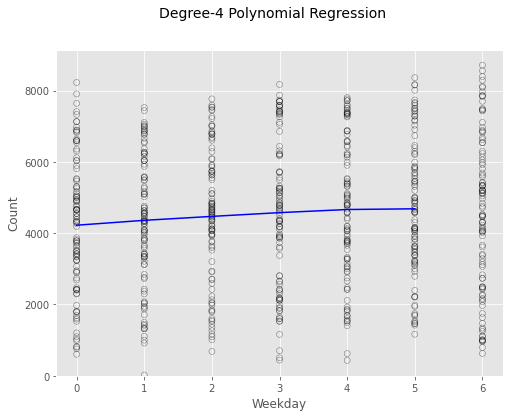

In [105]:
# Generamos una secuencia de valores del clima abarcando el rango
weekday_grid = np.arange(bike_day.weekday.min(), bike_day.weekday.max()).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(weekday_grid)

# Predecimos el valor del clima generado
y_pred = poly4.predict(X_test)

# Graficamos
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Degree-4 Polynomial Regression', fontsize=14)

# Graficamos la linea de la regresión polonomial
plt.scatter(bike_day.weekday, bike_day.cnt, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(weekday_grid, y_pred, color = 'b')
ax.set_ylim(ymin=0)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

Lo primero que se observa claramente es el hecho de que el día 6 no se alquilan bicicletas prácticamente, por lo que esta no interfiere. Por otro lado, a medida que pasan los días la renta de bicicletas crece, llegando a su punto máximo el día 5 aproximadamente con 5000 rentadas.

### Natural cubic spline

Se realizará una regresión con spline no suaves con múltiples variables. 

In [106]:
#Dividimos los datos 
bike_day_train, bike_day_test = train_test_split(bike_day, test_size=0.25, random_state=123)
print(bike_day_train.shape)
print(bike_day_test.shape)

(548, 16)
(183, 16)


Se dividieron los datos en un 75% para entrenamiento y un 25% para prueba obteniendo de los 731 muestras, 548 para entrenamiento y 183 para prueba.

Se incluyeron múltiples variables en la regresión con un spline natural cúbico, para esto se usó la multiplicación tensorial de diferentes bases de funciones.
Luego, realizamos un ajuste usando los datos de entrenamiento y realizamos la predicción sobre el test set, devolviéndonos así la métrica del RMSE.

In [107]:
deg=4 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(bike_day_train.temp, df={deg}), cr(bike_day_train.atemp, df={deg}),cr(bike_day_train.hum,df={deg}))", # se definen los splines
                           {"bike_day_train.temp": bike_day_train.temp, "bike_day_train.atemp": bike_day_train.atemp,
                            "bike_day_train.hum":bike_day_train.hum} # Se definen los datos
)

model_spline = sm.GLM(bike_day_train.cnt, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(bike_day_test.temp, df={deg}), cr(bike_day_test.atemp, df={deg}),cr(bike_day_test.hum,df={deg}))", # Splines
             {"bike_day_test.temp": bike_day_test.temp, "bike_day_test.atemp": bike_day_test.atemp,
                            "bike_day_test.hum":bike_day_test.hum}, # datos
            return_type='dataframe') )

print("El RMSE es:",np.sqrt(mean_squared_error(bike_day_test.cnt, prediccion)) )

El RMSE es: 27554.948343097516


In [108]:
deg=3 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(bike_day_train.temp, df={deg}), cr(bike_day_train.atemp, df={deg}),cr(bike_day_train.hum,df={deg}))", # se definen los splines
                           {"bike_day_train.temp": bike_day_train.temp, "bike_day_train.atemp": bike_day_train.atemp,
                            "bike_day_train.hum":bike_day_train.hum} # Se definen los datos
)

model_spline = sm.GLM(bike_day_train.cnt, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(bike_day_test.temp, df={deg}), cr(bike_day_test.atemp, df={deg}),cr(bike_day_test.hum,df={deg}))", # Splines
             {"bike_day_test.temp": bike_day_test.temp, "bike_day_test.atemp": bike_day_test.atemp,
                            "bike_day_test.hum":bike_day_test.hum}, # datos
            return_type='dataframe') )

print("El RMSE es:",np.sqrt(mean_squared_error(bike_day_test.cnt, prediccion)) )

El RMSE es: 3434.8377306226744


Se usaron las variables de `temp`, `atemp` y `hum` que corresponden a la temperatura en grados celsius, sensación termica en grados celsius y humedad respectivamente, todas normalizadas. Se hará una predicción de estas variables con nuestra variable dependiente `count` y así obtenemos primeramente un RMSE de aproximadamente 27554.94, lo cual es extremadamente alto para el modelo. Sin embargo, nos damos que cuenta que cuando bajamos los grados de libertad a 3 obtenemos un RMSE aproximado de 3434.83 que mejora bastante pero, aún así, sigue siendo muy alto. Concluimos entonces que los grados de libertad van relacionado con nuestro RMSE y así mismo, que nuestro modelo no es para nada adecuado ya que un RMSE tan alto nos genera muchos problemas.

## Bootstrap

Para utilizar `Bootstrap` calculamos la media de 1000 estimaciones.

In [109]:
repetitions = 1000
score_list = []
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30)
scaler = StandardScaler().fit(X_train)
alphas = 10**np.linspace(10,-2,100)

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') 
ridge_cv.fit(scaler.transform(X_train), y_train)

for i in range(repetitions):
    bootstrap_sample = X_train.sample(n = len(X_train), replace = True)
    
    model = Ridge(alpha=ridge_cv.alpha_)
    scores = cross_val_score(model, bootstrap_sample, y_train, cv=5)
    scores = cross_val_score(model, bootstrap_sample, y_train, cv=5, scoring = "neg_mean_squared_error")
    
    scores = -scores
    score_list.append(np.mean(scores))
conf_intervals = np.percentile(score_list, [2.5, 97.5])
conf_intervals

array([3961616.92364515, 4223854.27391219])

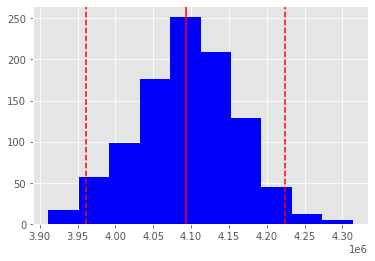

In [110]:
fig, ax = plt.subplots()
ax.hist(score_list, color = 'blue')
ax.axvline(x = conf_intervals[0], color = 'red', linestyle ='--')
ax.axvline(x = conf_intervals[1], color = 'red', linestyle ='--')
ax.axvline(x = np.mean(conf_intervals), color = 'red', linestyle ='-')
plt.show()

Con base en lo anterior podemos determinar que con un 95% de confianza, el intervalo correspondiente a las medias es [3619661, 3876629.1].

### Conclusiones

- Al realizar la regresión lineal podemos observar que con un 84.83%, los datos se ven descritos en el modelo de regresión lineal realizado.

- Observamos que algunos predictores, que corresponden a las variables categóricas del dataset, no aportaban nada a la regresión lineal. Con esto, nos pudimos dar cuenta que por ejemplo, el día 2 (martes) de la semana no influye en la estimación del conteo de bicicletas.

- Al realizar la regresión Ridge y Lasso escogiendo el valor de $\lambda$ por medio de Validación Cruzada, podemos ver que la primera tiene un menor MSE que la segunda.

- Sin embargo, al ajustar los modelos de regresión con LOOCV vemos que el MSE de la regresión lineal es considerablemente menor que el de la regresión Ridge y Lasso, que son muy grandes. 

- Los scores obtenidos en la última parte por medio de k-fold cross validation nos permiten observar que entre las tres regresiones utilizadas, la que mejor score tiene es la regresión Lasso. Además, podemos ver que los scores obtenidos en los tres casos son muy similares, no como en el caso anterior con LOOCV. 

- Se concluye que el clima con el que más se rentan las bicicletas es con uno despejado, con pocas nubes o parcialmente nublado. Además, los días que hace lluvia y poca nieve no se rentan bicicletas.

- En cuanto al día de la semana en el que menos se rentan bicicletas, podemos obtener la siguiente interpreteción: 
    - Si consideramos que el día 0 corresponde al lunes y el día 6 al domingo, estaríamos frente a una situación donde se rentan menos bicicletas el día domingo. Por ende, se puede decir que en el sector al que corresponden los datos, las personas rentan las bicicletas para ir al trabajo entre semana.

- La temperatura, la sensación térmica y la humedad no representan demasiada información para evaluar la renta de bicicletas.